In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import gc
import datetime
from function_utils import haversine_vectorize

In [2]:
sns.set_palette("Pastel2")

In [3]:
# Importation 
df_customers = pd.read_csv("datasets/olist_customers_dataset.csv")
df_geo = pd.read_csv("datasets/olist_geolocation_dataset.csv")

In [4]:
df_customers = pd.merge(df_geo, df_customers,
                        right_on=["customer_zip_code_prefix", "customer_city", "customer_state"], 
                        left_on=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], how="right")
df_customers.drop(["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], axis=1, inplace=True)
df_customers = df_customers[['customer_id', "customer_unique_id", "customer_city", "geolocation_lat", "geolocation_lng"]]
df_customers.columns = ["customer_id", "customer_unique_id", "customer_city", "customer_latitude", "customer_longitude"]
df_customers.head()

,customer_id,customer_unique_id,customer_city,customer_latitude,customer_longitude
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,-20.515413,-47.398194


In [5]:
df_customers["customer_unique_id"].nunique()

96096

In [6]:
df_customers["customer_id"].nunique()

99441

In [7]:
df_customers.drop_duplicates(subset="customer_id", inplace=True)
df_customers.drop_duplicates(subset="customer_unique_id", inplace=True)

In [8]:
df_customers.shape

(96096, 5)

In [9]:
df_orders = pd.read_csv("datasets/olist_orders_dataset.csv")
df_orders.shape

(99441, 8)

In [10]:
df = pd.merge(df_customers, df_orders, left_on="customer_unique_id", right_on="customer_id", how="right")
df.shape

(99441, 13)

In [11]:
df_orders_payments = pd.read_csv("datasets/olist_order_payments_dataset.csv")
df_orders_payments.shape

(103886, 5)

In [12]:
df = pd.merge(df, df_orders_payments, left_on="order_id", right_on="order_id", how="right")
df.shape

(103886, 17)

In [13]:
df.head()

,customer_id_x,customer_unique_id,customer_city,customer_latitude,customer_longitude,order_id,customer_id_y,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,NaN,NaN,NaN,NaN,NaN,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,1,credit_card,8,99.33
1,NaN,NaN,NaN,NaN,NaN,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,1,credit_card,1,24.39
2,NaN,NaN,NaN,NaN,NaN,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,1,credit_card,1,65.71
3,NaN,NaN,NaN,NaN,NaN,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,1,credit_card,8,107.78
4,NaN,NaN,NaN,NaN,NaN,42fdf880ba16b47b59251dd489d4441a,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,1,credit_card,2,128.45


In [14]:
df.drop(["customer_id_x", "customer_unique_id"], axis=1, inplace=True)
df.head(3)

,customer_city,customer_latitude,customer_longitude,order_id,customer_id_y,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,NaN,NaN,NaN,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,1,credit_card,8,99.33
1,NaN,NaN,NaN,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,1,credit_card,1,24.39
2,NaN,NaN,NaN,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,1,credit_card,1,65.71


In [15]:
df.rename(columns={"customer_id_y" : "customer_id"}, inplace=True)

In [16]:
time = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for cols in time:
    df[cols] = pd.to_datetime(df[cols], format="%Y-%m-%d", errors="ignore")

In [17]:
snapshot_date = max(df.order_purchase_timestamp) + datetime.timedelta(days=1)

In [18]:
rfm_custom = df.groupby("customer_id").agg({
    "order_purchase_timestamp" : lambda x: (snapshot_date - x.max()).days,
    "order_id" : 'count',
    "payment_value" : "mean"
})

In [19]:
rfm_custom.columns = ["Recency", "Frequency", "MonetaryValue"]
data = rfm_custom.copy().reset_index()

In [20]:
data.head()

,customer_id,Recency,Frequency,MonetaryValue
0,00012a2ce6f8dcda20d059ce98491703,338,1,114.74
1,000161a058600d5901f007fab4c27140,459,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,597,1,195.42
3,0002414f95344307404f0ace7a26f1d5,428,1,179.35
4,000379cdec625522490c315e70c7a9fb,199,1,107.01


In [21]:
data.describe()

,Recency,Frequency,MonetaryValue
count,99440.000000,99440.000000,99440.000000
mean,290.895444,1.044710,158.317915
std,153.660796,0.381166,219.194549
min,1.000000,1.000000,0.000000
25%,167.000000,1.000000,60.190000
50%,272.000000,1.000000,103.330000
75%,401.000000,1.000000,174.990000
max,773.000000,29.000000,13664.080000


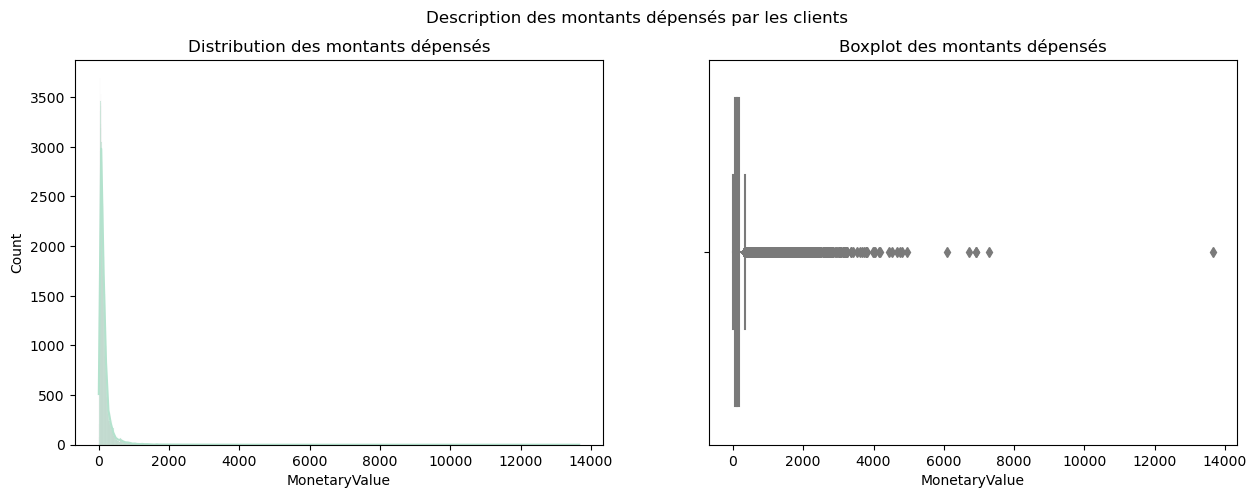

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des montants dépensés par les clients')

sns.histplot(ax=axes[0],x="MonetaryValue", data=data, kde=True)
axes[0].set_title("Distribution des montants dépensés")

sns.boxplot(ax=axes[1], x="MonetaryValue", data=data)
axes[1].set_title("Boxplot des montants dépensés")

plt.show()

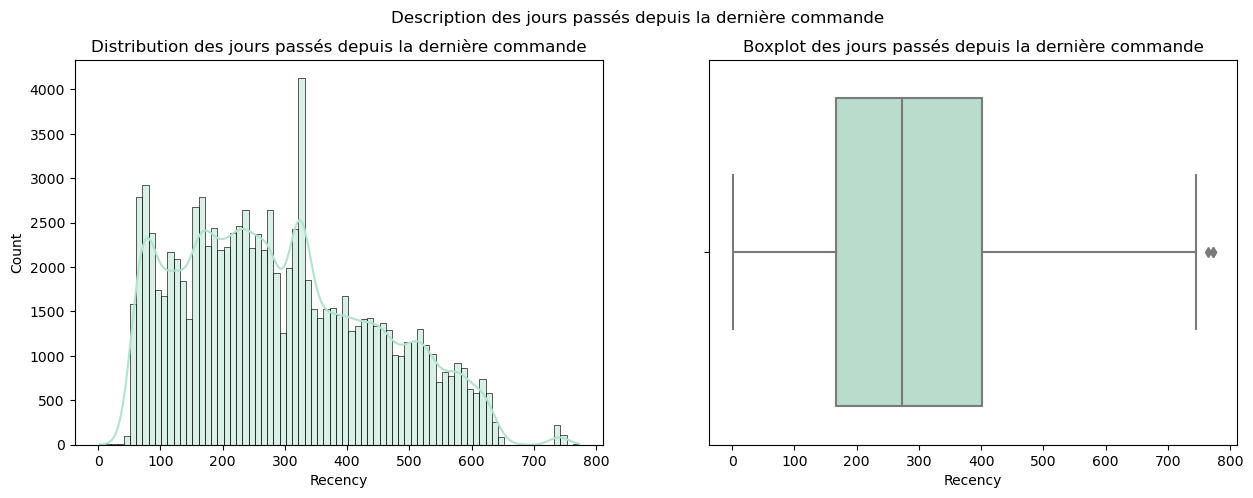

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des jours passés depuis la dernière commande')

sns.histplot(ax=axes[0],x="Recency", data=data, kde=True)
axes[0].set_title("Distribution des jours passés depuis la dernière commande")

sns.boxplot(ax=axes[1], x="Recency", data=data)
axes[1].set_title("Boxplot des jours passés depuis la dernière commande")

plt.show()

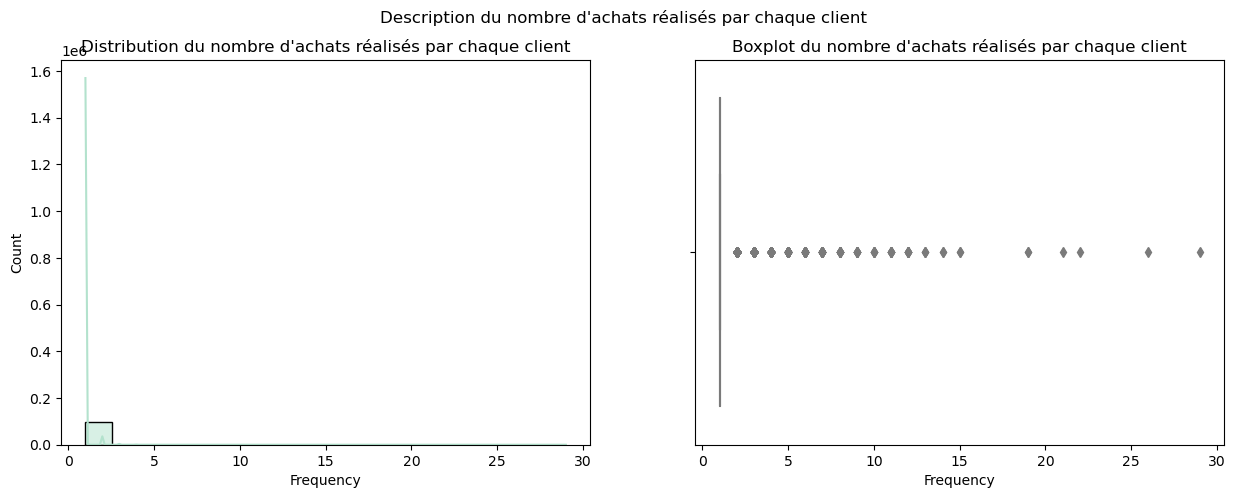

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description du nombre d\'achats réalisés par chaque client')

sns.histplot(ax=axes[0],x="Frequency", data=data, kde=True)
axes[0].set_title("Distribution du nombre d\'achats réalisés par chaque client")

sns.boxplot(ax=axes[1], x="Frequency", data=data)
axes[1].set_title("Boxplot du nombre d\'achats réalisés par chaque client")

plt.show()

In [25]:
del df_orders_payments
del rfm_custom

In [26]:
gc.collect()

177356

In [27]:
data.to_csv("datasets/data_segmentation_rfm.csv")

- Comparer résultats avec découpage en quartiles
- Fréquence/Récence pas assez discriminante/ (Conseiller le client pour voir comment "tracer" ces consommateurs pour pouvoir mieux segmenter la clientèle)

- Après RFM ajout d'autres paramètres (données géographiques ; score)

In [28]:
df_sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")
df_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [29]:
df_sellers = pd.merge(df_geo, df_sellers,
                        right_on=["seller_zip_code_prefix", "seller_city", "seller_state"], 
                        left_on=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], how="right")
df_sellers.drop(["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], axis=1, inplace=True)
df_sellers = df_sellers[['seller_id', "geolocation_lat", "geolocation_lng"]]
df_sellers.columns = ["seller_id", "seller_latitude", "seller_longitude"]
df_sellers.head()

,seller_id,seller_latitude,seller_longitude
0,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,-22.896154,-47.062431


In [30]:
df_sellers.drop_duplicates(subset="seller_id", inplace=True)

In [31]:
df_items = pd.read_csv("datasets/olist_order_items_dataset.csv")
df_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [32]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [33]:
df_items = pd.merge(df_orders, df_items, on="order_id", how="left")

In [34]:
df_items = pd.merge(df_items, df_customers, on="customer_id", how="left")

In [35]:
df_items = pd.merge(df_sellers, df_items, on="seller_id", how="left")

In [36]:
df_items.head(3)

,seller_id,seller_latitude,seller_longitude,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_city,customer_latitude,customer_longitude
0,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,1.0,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92,b4527423469300ee354458e1b5f961be,contagem,-19.961706,-44.035239
1,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,2.0,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42,NaN,NaN,NaN,NaN
2,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,1.0,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56,f421a2a66b69dbfe6db0c87845281a90,sao paulo,-23.667671,-46.677754


In [37]:
df_items.dropna(subset=["customer_city"], inplace=True)

In [38]:
df_items["distance_customer_seller"] = haversine_vectorize(df_items["customer_longitude"], df_items["customer_latitude"], df_items["seller_longitude"], df_items["seller_latitude"])

In [39]:
df_items = df_items[["customer_id", "distance_customer_seller"]]

In [40]:
data = pd.merge(data, df_items, on="customer_id", how="left")

In [41]:
df_reviews = pd.read_csv("datasets/olist_order_reviews_dataset.csv")
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [42]:
df_reviews.drop(["review_id", "review_creation_date", "review_answer_timestamp"], axis=1, inplace=True)

In [43]:
df_orders = pd.read_csv("datasets/olist_orders_dataset.csv")
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [44]:
df_orders.drop(["order_purchase_timestamp", "order_delivered_carrier_date"], axis=1, inplace=True)
cols_time = ["order_approved_at", "order_delivered_customer_date", "order_estimated_delivery_date"]

for cols in cols_time:
    df_orders[cols] = pd.to_datetime(df_orders[cols], format="%Y-%m-%d", errors="ignore")

In [45]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_approved_at              99281 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [46]:
df_orders["nb_days_before_delivered"] = df_orders["order_delivered_customer_date"] - df_orders["order_approved_at"]
df_orders["nb_days_before_delivered_estimation"] = df_orders["order_estimated_delivery_date"] - df_orders["order_approved_at"]

cols_var = ["nb_days_before_delivered", "nb_days_before_delivered_estimation"]

for cols in cols_var:
    df_orders[cols] = df_orders[cols].dt.days

df_orders.drop(["order_approved_at", "order_delivered_customer_date", "order_estimated_delivery_date"], axis=1, inplace=True)

In [47]:
df_orders.head()

,order_id,customer_id,order_status,nb_days_before_delivered,nb_days_before_delivered_estimation
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,8.0,15.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,12.0,17.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,9.0,26.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,13.0,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2.0,12.0


In [48]:
df_customers_orders = pd.merge(df_customers, df_orders, on="customer_id", how="right")
df_customers_orders.shape

(99441, 9)

In [49]:
df_customers_orders = pd.merge(df_customers_orders, df_reviews, on="order_id", how="left")
df_customers_orders.shape

(100000, 12)

In [50]:
df_customers_orders.head(3)

,customer_id,customer_unique_id,customer_city,customer_latitude,customer_longitude,order_id,order_status,nb_days_before_delivered,nb_days_before_delivered_estimation,review_score,review_comment_title,review_comment_message
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,-23.574809,-46.587471,e481f51cbdc54678b7cc49136f2d6af7,delivered,8.0,15.0,4,NaN,"Não testei o produto ainda, mas ele veio corre..."
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,-12.169860,-44.988369,53cdb2fc8bc7dce0b6741e2150273451,delivered,12.0,17.0,4,Muito boa a loja,Muito bom o produto.
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,-16.746337,-48.514624,47770eb9100c2d0c44946d9cf07ec65d,delivered,9.0,26.0,5,NaN,NaN


In [51]:
df_customers_orders.drop(["customer_unique_id", "order_id"], axis=1, inplace=True)

In [52]:
df_customers_orders.shape

(100000, 10)

In [53]:
df_customers_orders = df_customers_orders.groupby("customer_id").mean().reset_index()

In [54]:
data = pd.merge(df_customers_orders, data, on="customer_id", how="right")
data.shape

(112661, 10)

In [55]:
data.head(3)

,customer_id,customer_latitude,customer_longitude,nb_days_before_delivered,nb_days_before_delivered_estimation,review_score,Recency,Frequency,MonetaryValue,distance_customer_seller
0,00012a2ce6f8dcda20d059ce98491703,-23.499689,-46.766901,13.0,19.0,1.0,338,1,114.74,120.729003
1,000161a058600d5901f007fab4c27140,-20.470582,-45.108716,9.0,18.0,4.0,459,1,67.41,131.914211
2,0001fd6190edaaf884bcaf3d49edf079,-18.716793,-40.397969,5.0,21.0,5.0,597,1,195.42,550.186581


In [56]:
data = pd.merge(df_customers, data, on="customer_id", how="right")
data.shape

(112661, 14)

In [57]:
data.drop(["customer_unique_id"], axis=1, inplace=True)

In [58]:
data.drop_duplicates(subset="customer_id", inplace=True)

In [59]:
data.drop(["customer_city", "customer_longitude_x", "customer_latitude_x", "customer_longitude_y", "customer_latitude_y"], axis=1, inplace=True)
data.set_index("customer_id", inplace=True)
data.head(3)

,nb_days_before_delivered,nb_days_before_delivered_estimation,review_score,Recency,Frequency,MonetaryValue,distance_customer_seller
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,13.0,19.0,1.0,338,1,114.74,120.729003
000161a058600d5901f007fab4c27140,9.0,18.0,4.0,459,1,67.41,131.914211
0001fd6190edaaf884bcaf3d49edf079,5.0,21.0,5.0,597,1,195.42,550.186581


In [60]:
data.describe()

,nb_days_before_delivered,nb_days_before_delivered_estimation,review_score,Recency,Frequency,MonetaryValue,distance_customer_seller
count,96461.000000,99280.000000,99440.000000,99440.000000,99440.000000,99440.000000,92508.000000
mean,11.642529,22.886311,4.071266,290.895444,1.044710,158.317915,603.479736
std,9.519820,8.859283,1.358382,153.660796,0.381166,219.194549,600.961218
min,-7.000000,-146.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,17.000000,4.000000,167.000000,1.000000,60.190000,184.341767
50%,9.000000,22.000000,5.000000,272.000000,1.000000,103.330000,434.634951
75%,15.000000,28.000000,5.000000,401.000000,1.000000,174.990000,801.938852
max,208.000000,153.000000,5.000000,773.000000,29.000000,13664.080000,9469.653270


In [ ]:
data = data.loc[data["nb_days_before_delivered"] > 0]
data = data.loc[data["nb_days_before_delivered_estimation"] > 0 ]

In [61]:
data.to_csv("datasets/data_clustering_complete.csv")